In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mv '/content/drive/MyDrive/scenery.webp' '/content/'

In [11]:
import cv2
img = cv2.imread('/content/scenery.webp', 0)
img.shape

(750, 1000)

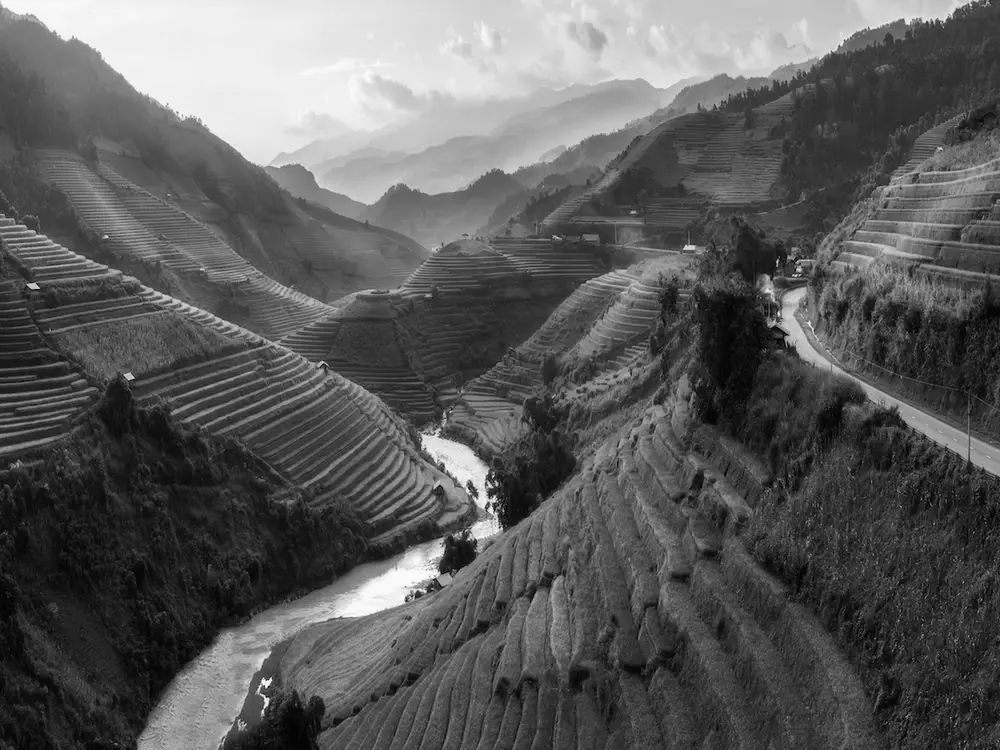

In [12]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [13]:
cv2.imwrite('grayimg.webp', img)

True

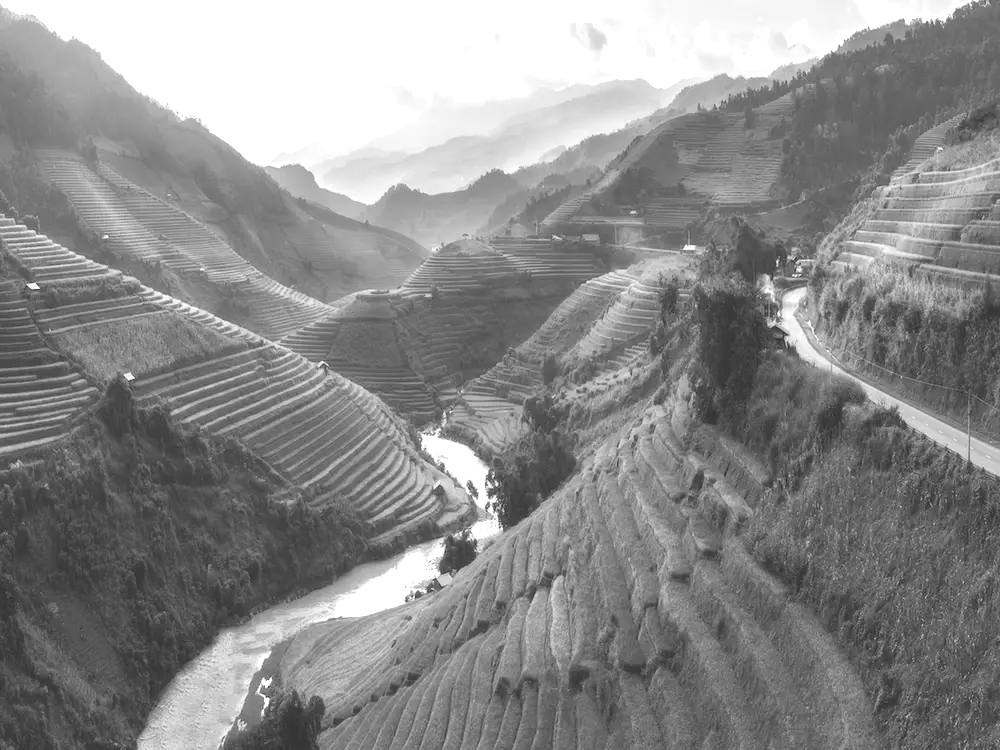

In [17]:
import numpy as np

# increase brightness
height = img.shape[0]
width = img.shape[1]
copy_img = np.zeros([height, width])
for i in range(height):
  for j in range(width):
    copy_img[i,j] = img[i,j]+50

cv2_imshow(copy_img)

In [18]:
# algorithm
def linear_interpolation(p1, p2, x):
    x1, y1 = p1
    x2, y2 = p2
    if x1 != x2:
        y = ((x2-x)/(x2-x1))*y1 + ((x-x1)/(x2-x1))*y2
    else:
        y = y1
    return y

def find_none_index(data):
    result = -1

    for i, v in enumerate(data):
        if v== None:
            result = i
            break

    return result

def find_end(data, index):
    end = len(data)
    for i in range(index+1, len(data), 1):
        if data[i] != None:
            end = i
            break
    return end

def process_data(data):
    while True:
        index = find_none_index(data)
        if index == -1:
            break

        # find begin
        begin = index - 1

        # find end
        end = find_end(data, index)

        if begin<0:
            y = data[end]
        elif end>=len(data):
            y = data[begin]
        else:
            p1 = (begin, data[begin])
            p2 = (end, data[end])
            y = linear_interpolation(p1=p1, p2=p2, x=index)

        data[index] = y
    return data

# test
data = [None, 2.2, 2.0, 2.2, None, 2.7, None, 4.9, None]
result = process_data(data)
print(result)

[2.2, 2.2, 2.0, 2.2, 2.45, 2.7, 3.8000000000000003, 4.9, 4.9]


(2250, 2000)


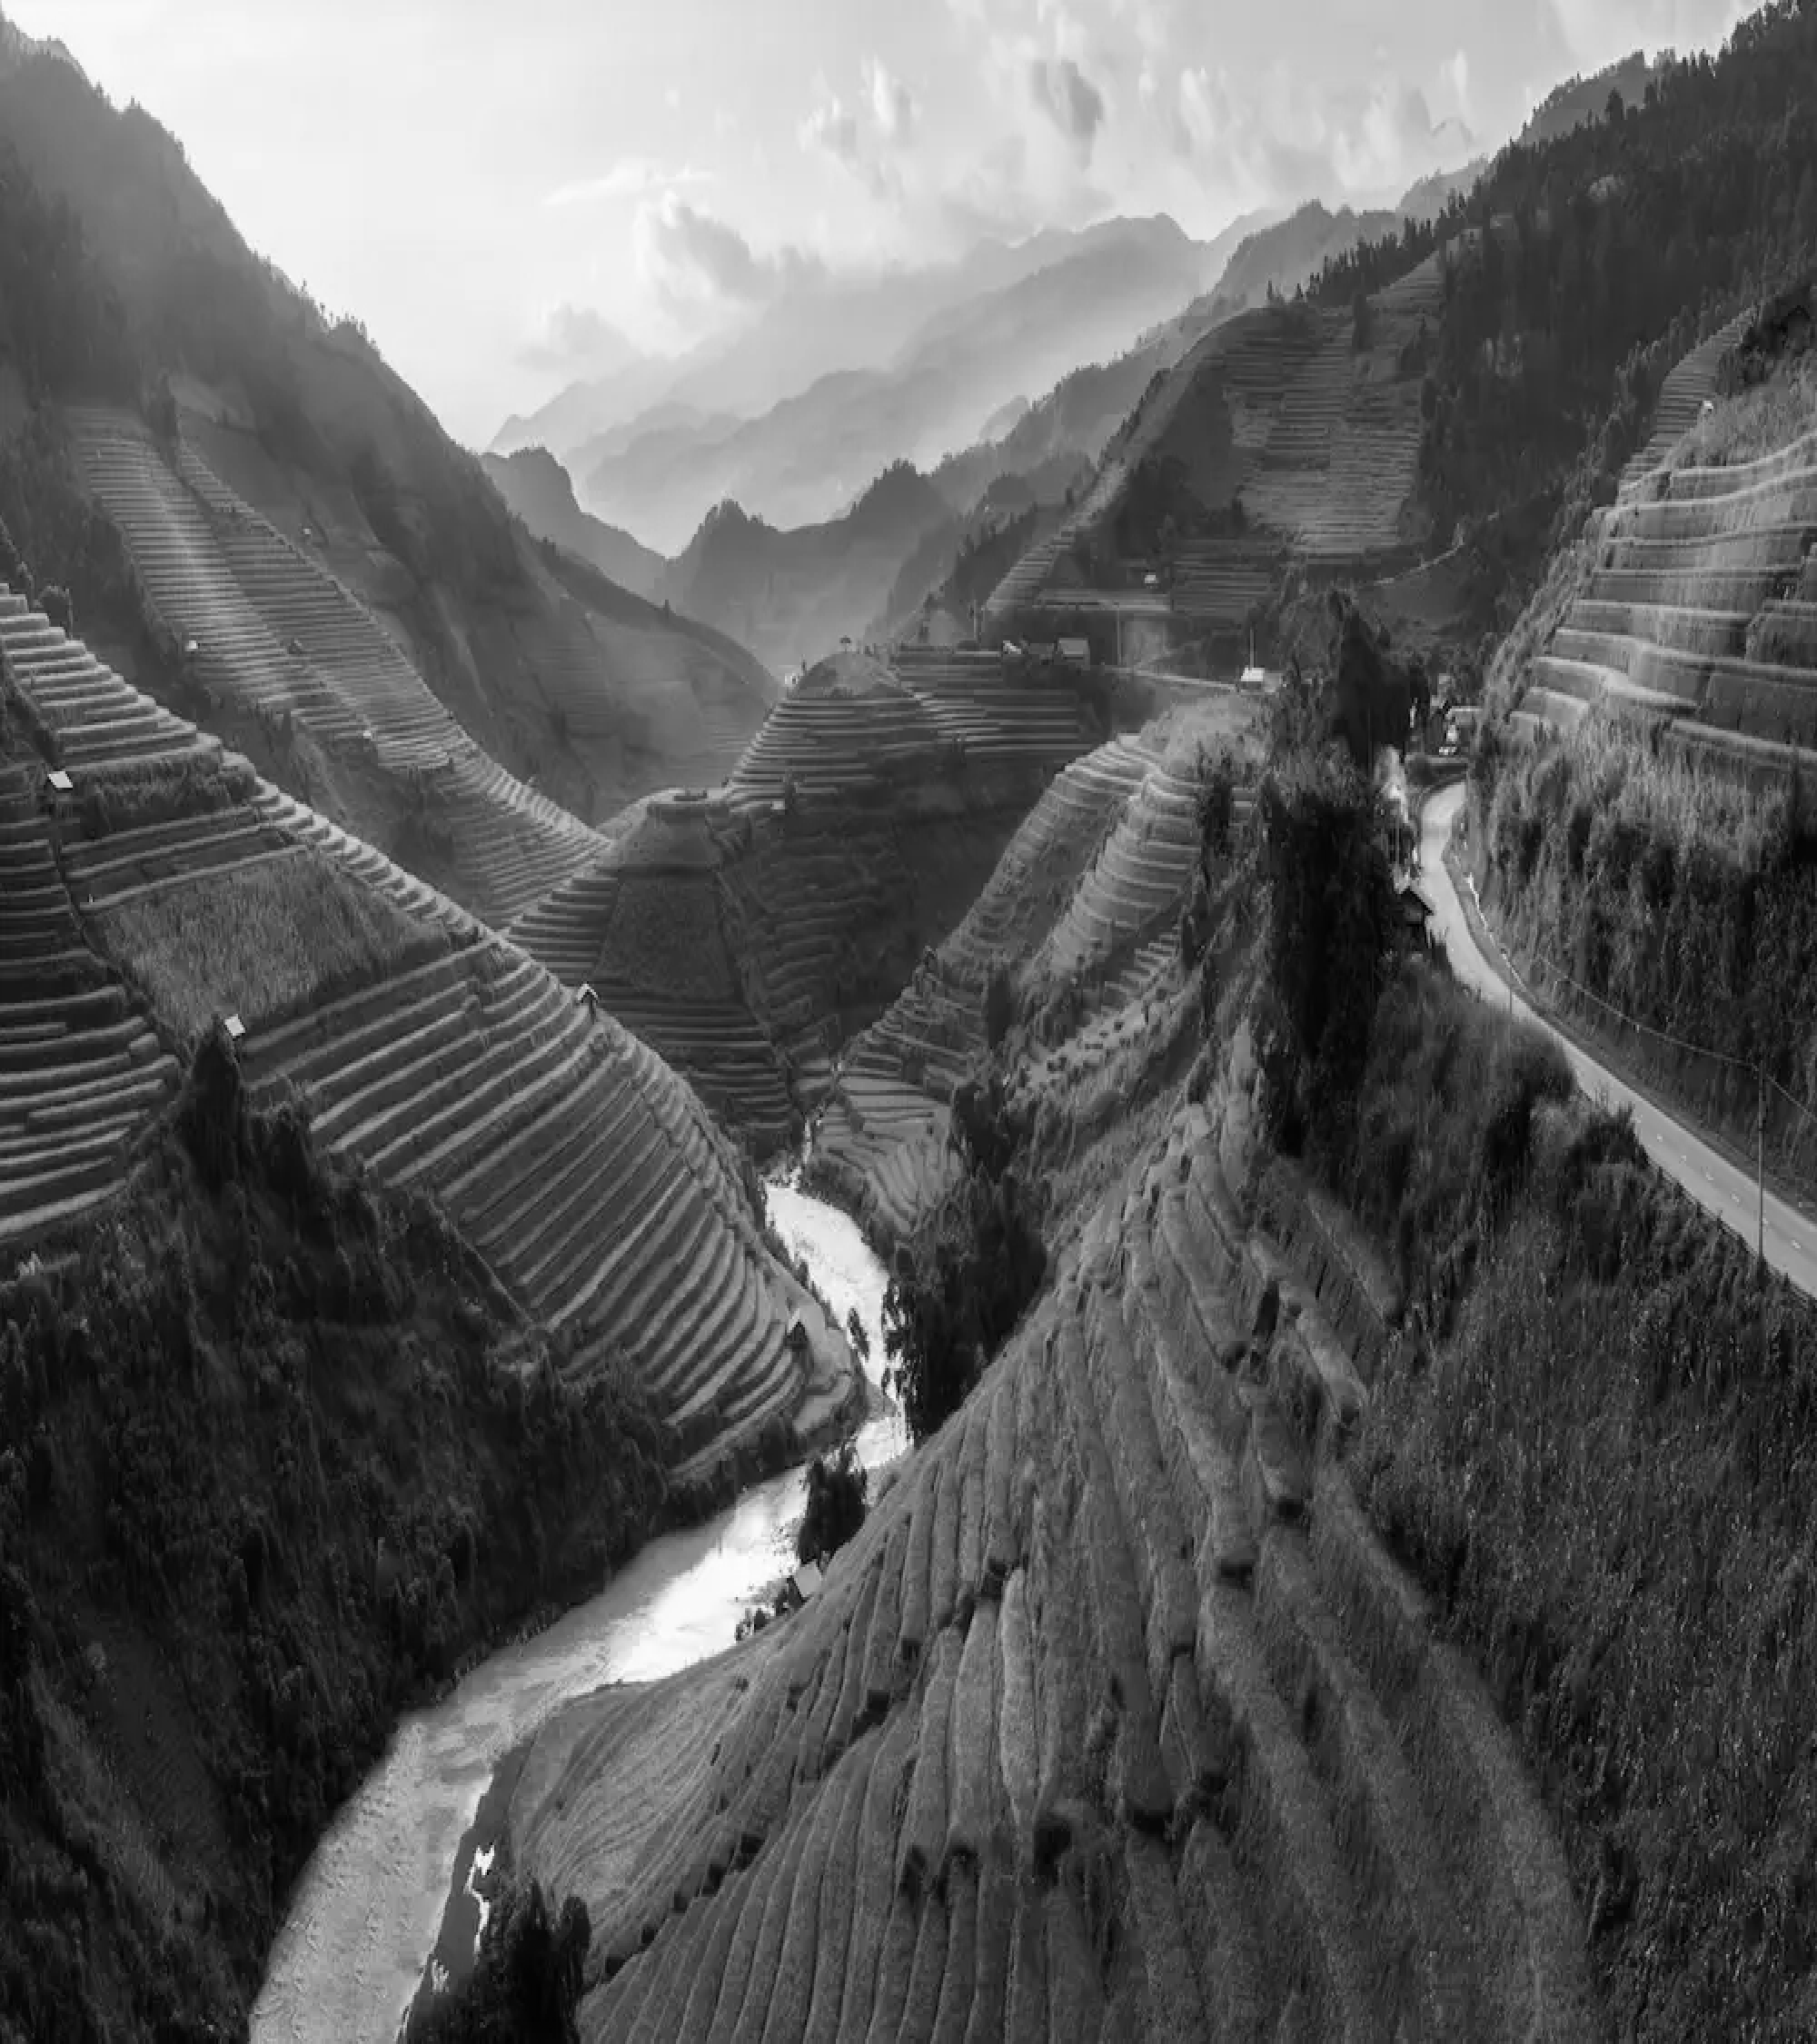

In [22]:
import math

#Resize image using nearest neightbour
def resize_nni(source, source_h, source_w, target_h, target_w):
    new_data = np.zeros([target_h, target_w])

    #Calculate horizontal and vertical scaling factor
    w_scale_factor = source_w/target_w
    h_scale_factor = source_h/target_h

    for i in range(target_h):
        for j in range(target_w):
            y = math.floor(i*h_scale_factor)
            x = math.floor(j*w_scale_factor)
            new_data[i,j] = source[y,x]

    return new_data

new_img = resize_nni(img, img.shape[0], img.shape[1], 750*3, 1000*2)
print(new_img.shape)
cv2_imshow(new_img)

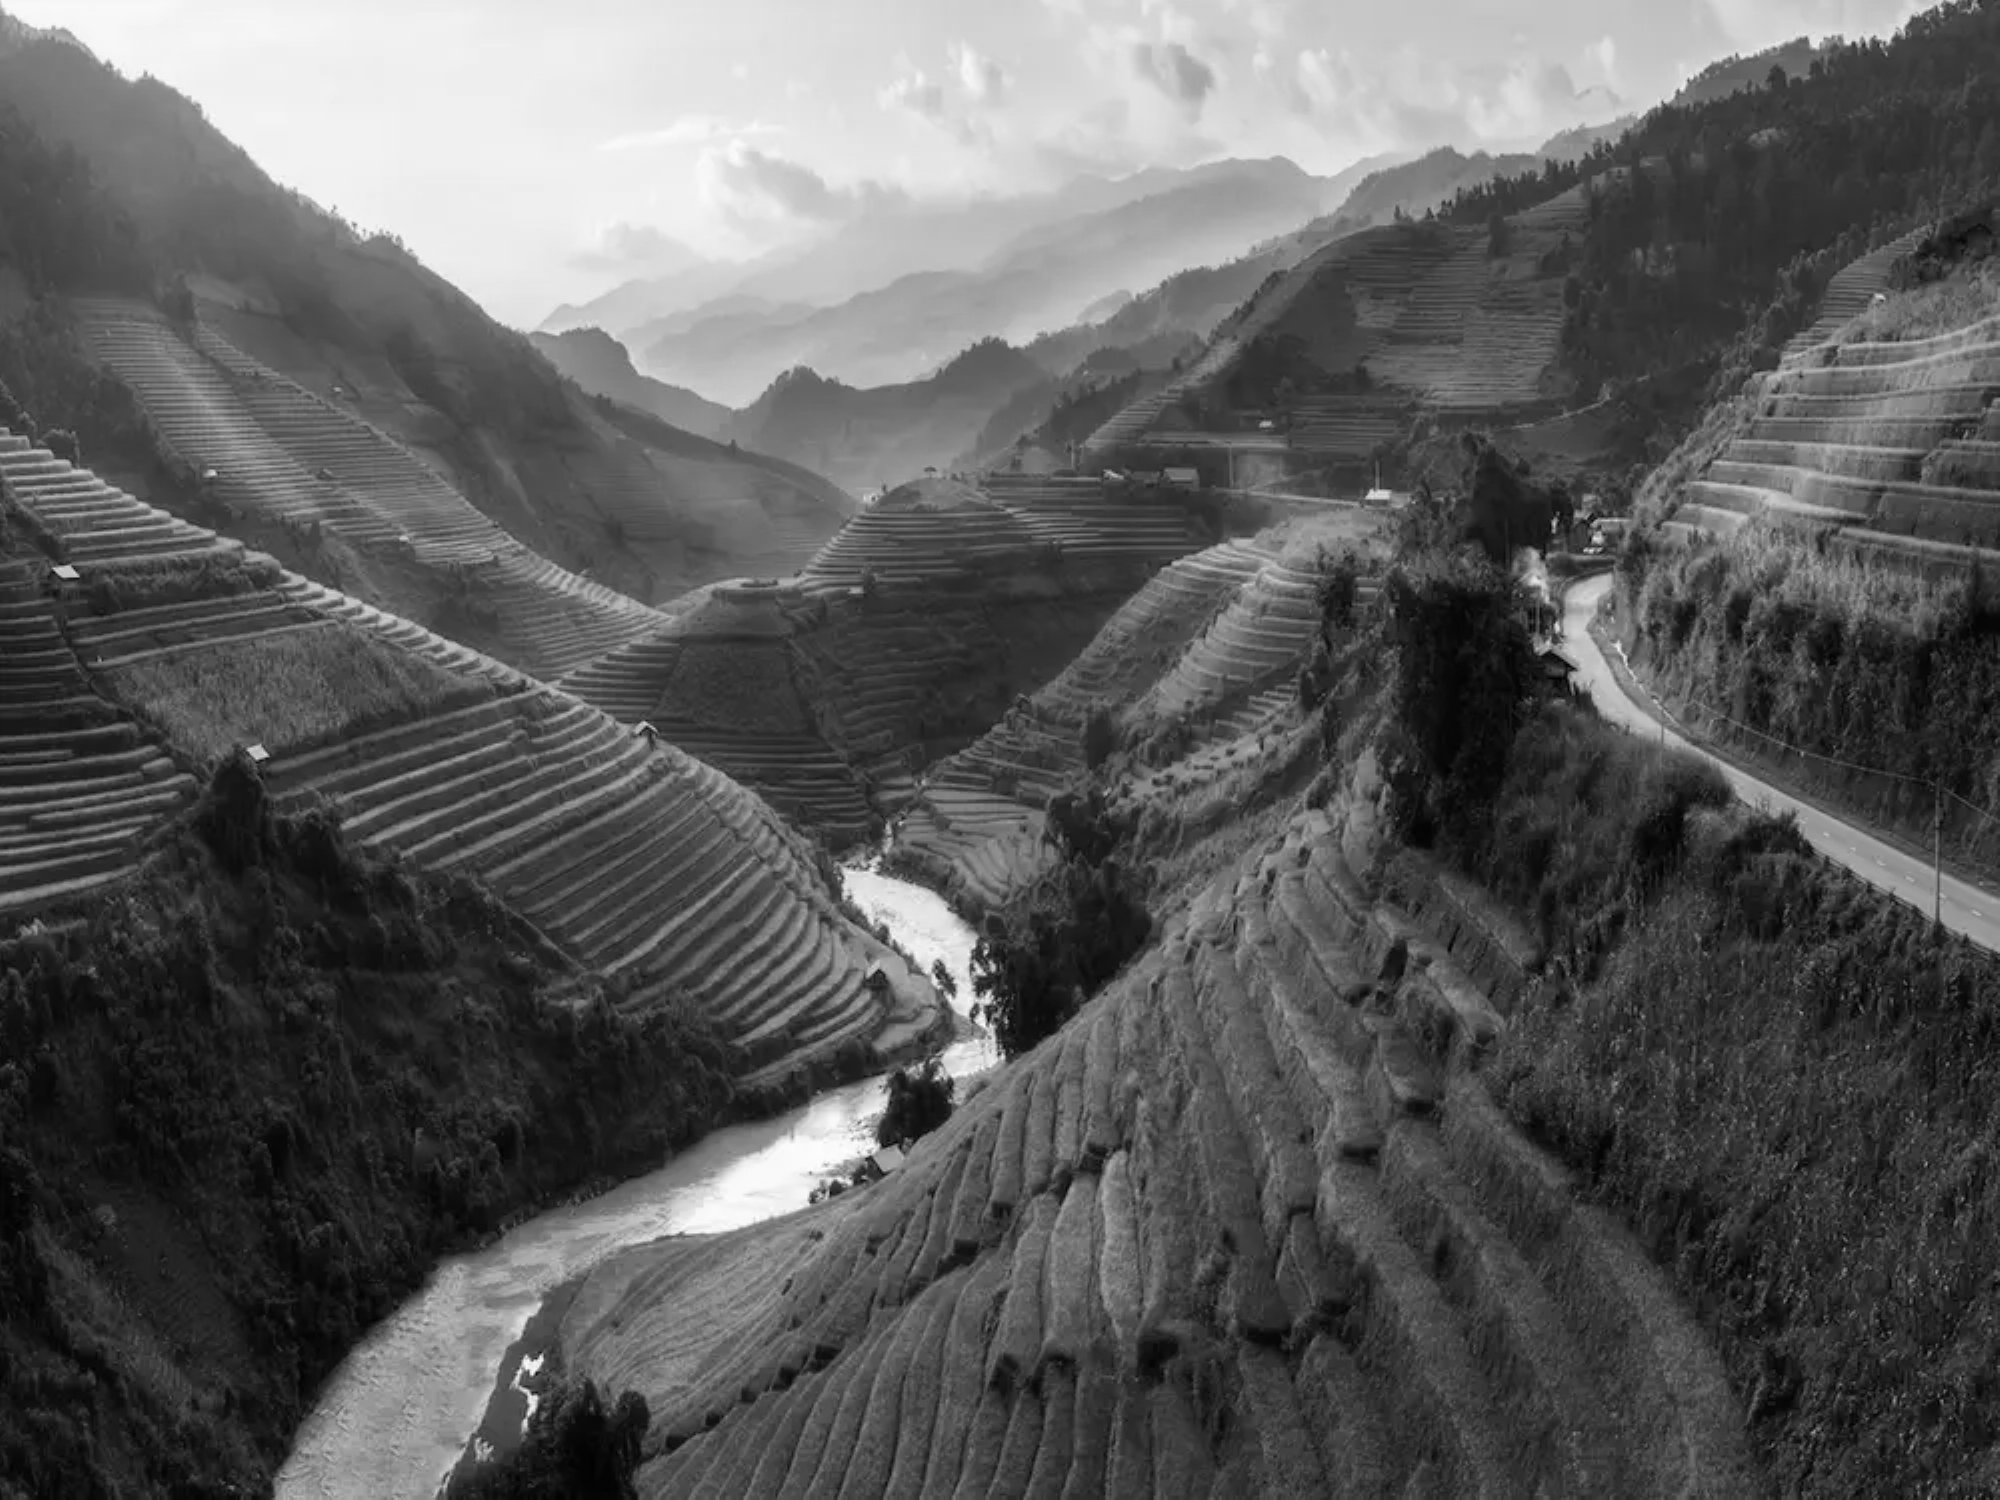

In [24]:
def bl_resize(original_img, source_h, source_w, target_h, target_w):
	resized = np.zeros([target_h, target_w])
	#Calculate horizontal and vertical scaling factor
	w_scale_factor = (source_w / target_w) if target_h != 0 else 0
	h_scale_factor = (source_h / target_h) if target_w != 0 else 0
	for i in range(target_h):
		for j in range(target_w):
			#map the coordinates back to the original image
			x = i * h_scale_factor
			y = j * w_scale_factor
			#calculate the coordinate values for 4 surrounding pixels.
			x_floor = math.floor(x)
			x_ceil = min(source_h - 1, math.ceil(x))
			y_floor = math.floor(y)
			y_ceil = min(source_w - 1, math.ceil(y))

			if (x_ceil == x_floor) and (y_ceil == y_floor):
				q = original_img[int(x),int(y)]
			elif (x_ceil == x_floor):
				q1 = original_img[int(x),int(y_floor)]
				q2 = original_img[int(x),int(y_ceil)]
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)
			elif (y_ceil == y_floor):
				q1 = original_img[int(x_floor),int(y)]
				q2 = original_img[int(x_ceil),int(y)]
				q = (q1 * (x_ceil - x)) + (q2	 * (x - x_floor))
			else:
				v1 = original_img[x_floor,y_floor]
				v2 = original_img[x_ceil,y_floor]
				v3 = original_img[x_floor,y_ceil]
				v4 = original_img[x_ceil,y_ceil]

				q1 = v1 * (x_ceil - x) + v2 * (x - x_floor)
				q2 = v3 * (x_ceil - x) + v4 * (x - x_floor)
				q = q1 * (y_ceil - y) + q2 * (y - y_floor)

			resized[i,j] = q
	return resized.astype(np.uint8)

new_img = bl_resize(img, img.shape[0], img.shape[1], 750*2, 1000*2)
cv2_imshow(new_img)